# Machine Learning using Classifiers

In [258]:
import os
import warnings
import sys 

from glob import glob

import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


import pickle

import errno

In [288]:
# Using Pipelines to implement various classifiers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [307]:
# Read the new training features, labels and the test from the folder 'after_feature_engg'

names = ['train_X', 'train_y','test_X']

input_file_path = r'/Users/rohankumar/Desktop/BBDC 2019/Data/pickle/after_feature_engg/train_X.pickle'
pl = open(input_file_path, 'rb')
train_X = pickle.load(pl)
print('train_X shape is ',train_X.shape)

input_file_path = r'/Users/rohankumar/Desktop/BBDC 2019/Data/pickle/after_feature_engg/train_y.pickle'
pl = open(input_file_path, 'rb')
train_y = pickle.load(pl)
print('train_y shape is ',train_y.shape)

test_X = pd.DataFrame()
with open(r'/Users/rohankumar/Desktop/BBDC 2019/Data/pickle/after_feature_engg/test_X.pickle', 'rb') as test_X:
    test_X = pickle.load(test_X)
print('test_X shape is ',test_X.shape)
    
input_file_path = r'/Users/rohankumar/Desktop/BBDC 2019/Data/pickle/after_feature_engg/labels.pickle'
pl = open(input_file_path, 'rb')
labels = pickle.load(pl)
print('labels shape is ',labels.shape)

train_X shape is  (6385, 27)
train_y shape is  (6385,)
test_X shape is  (1738, 27)
labels shape is  (6385, 1)


### PCA decompose

In [262]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state = 42)
pca.fit(train_X)
pca_df = pca.transform(train_X)
pca_df = pd.DataFrame(pca_df, columns=['pca1','pca2','pca3'])
pca_df

,pca1,pca2,pca3
0,-2.366567e+06,31119.655569,6639.705329
1,4.651335e+06,-9119.838456,5914.941765
2,5.386319e+06,2129.129383,-835.073006
3,-1.514568e+06,10366.547247,-5865.199101
4,-2.366562e+06,29588.314102,6582.662821
...,...,...,...
6380,-6.023056e+05,-15424.333116,-6570.368108
6381,-2.002029e+06,10274.222010,-2616.215835
6382,-1.827319e+06,3928.653639,-5901.215071
6383,5.996507e+06,3608.016250,-1798.179822


In [278]:
importance_df = pd.DataFrame(pd.Series(pca.explained_variance_ratio_)*100)
importance_df

,0
0,99.997263
1,0.001426
2,0.000438


In [292]:
# Split the dataset into train and test

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    train_X,
    train_y,
    test_size = 0.25,
    random_state=5)

In [250]:
## Random Forest
RandomForest_clf = RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features=0.25, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False)

RandomForest_clf.fit(train_x, train_y)

RandomForest_clf.score(test_x, test_y)

0.9561678146524734

In [280]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                       
                        ('lr_classifier', LogisticRegression())])

pipeline_dt = Pipeline([('scalar2', StandardScaler()),
                        ('pca2',PCA(n_components=2)), 
                        ('dt_classifier',DecisionTreeClassifier())])

pipeline_rf = Pipeline([('scalar3', StandardScaler()),
                        ('pca3', PCA(n_components=2)),
                        ('rf_classifier', RandomForestClassifier())])

# List of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

# Pipe dictionary for easy reference
pipe_dict = {0:'Logistic Regression', 1:'Decision Tree Classifier', 2:'Random Forest Classifier'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(train_X, train_y)

print("Training Data contains {}".format(train_X.shape))
print("Testing Data contains {}".format(test_X.shape))
    

for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(test_x, test_y)))

/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Data contains (6385, 27)
Testing Data contains (1738, 27)
Logistic Regression Test Accuracy: 0.8484658735128365
Decision Tree Classifier Test Accuracy: 1.0
Random Forest Classifier Test Accuracy: 0.9993738259236068


### Hyperparameter Tuning with Grid Search

In [256]:
pipeline_lr = Pipeline([('scaler1',StandardScaler()), ('l_reg',LogisticRegression(multi_class='auto',
                                                                                  random_state=42))])

pipeline_knn = Pipeline([('scaler',StandardScaler()), ('knn',KNeighborsClassifier())])

pipeline_randomforest = Pipeline([('rf',RandomForestClassifier())])

model_pipeline = [pipeline_lr, pipeline_knn, pipeline_randomforest]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Logistic Regression', 1: 'KNN', 2: 'RandomForest'}

parameters = [
                {
                'l_reg__penalty': ['l2'],
                'l_reg__C': np.logspace(0, 4, 10)
                },
                {
                 'knn__n_neighbors': range(1, 20),
                 'knn__weights': ['uniform', 'distance']
                },
                {
                 'rf__n_estimators': [10, 30, 50, 100, 200,  500, 1000],
                 'rf__max_features': [0.25, 1.0]
                }
              ]

# fit the pipeline with the training data
for model, pipe in zip(model_pipeline, pipe_dict):
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=parameters[pipe], 
                               cv = StratifiedKFold(n_splits=5, shuffle=False)
                              )
    grid_search.fit(train_X, train_y)

    joblib.dump(grid_search, f"/Users/rohankumar/Desktop/BBDC 2019/Data/models/{pipe_dict[pipe]}.pkl")

    print("{}: model best parameters are --> {}".format(pipe_dict[pipe], grid_search.best_params_))

    print("{}: cv accuracy is  {}".format(pipe_dict[pipe], grid_search.best_score_*100))

/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rohankumar/anaconda3/envs/bbdc19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Logistic Regression: model best parameters are --> {'l_reg__C': 1.0, 'l_reg__penalty': 'l2'}
Logistic Regression: cv accuracy is  59.530148786217694
KNN: model best parameters are --> {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
KNN: cv accuracy is  62.53719655442443
RandomForest: model best parameters are --> {'rf__max_features': 0.25, 'rf__n_estimators': 200}
RandomForest: cv accuracy is  70.38371182458889


<p>We get the max accuracy at 70.38 from the Random Forest Classifier</p>

### Use the optimum parameters from the GridSearch and build model

In [ ]:
## Use the train test split from the previous cell and set the parameters of random forest

RandomForest_clf = RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features=0.25, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False)

RandomForest_clf.fit(train_x, train_y)
RandomForest_clf.score(test_x, test_y)

In [284]:
# predictions on test set
predictions = RandomForest_clf.predict(test_x)

# Probabilities for each class
probs = RandomForest_clf.predict_proba(test_x)[:, 1]

### Using the built model for evaluation
<p>We will use confusion matrix to see how well our predictions are.</p>

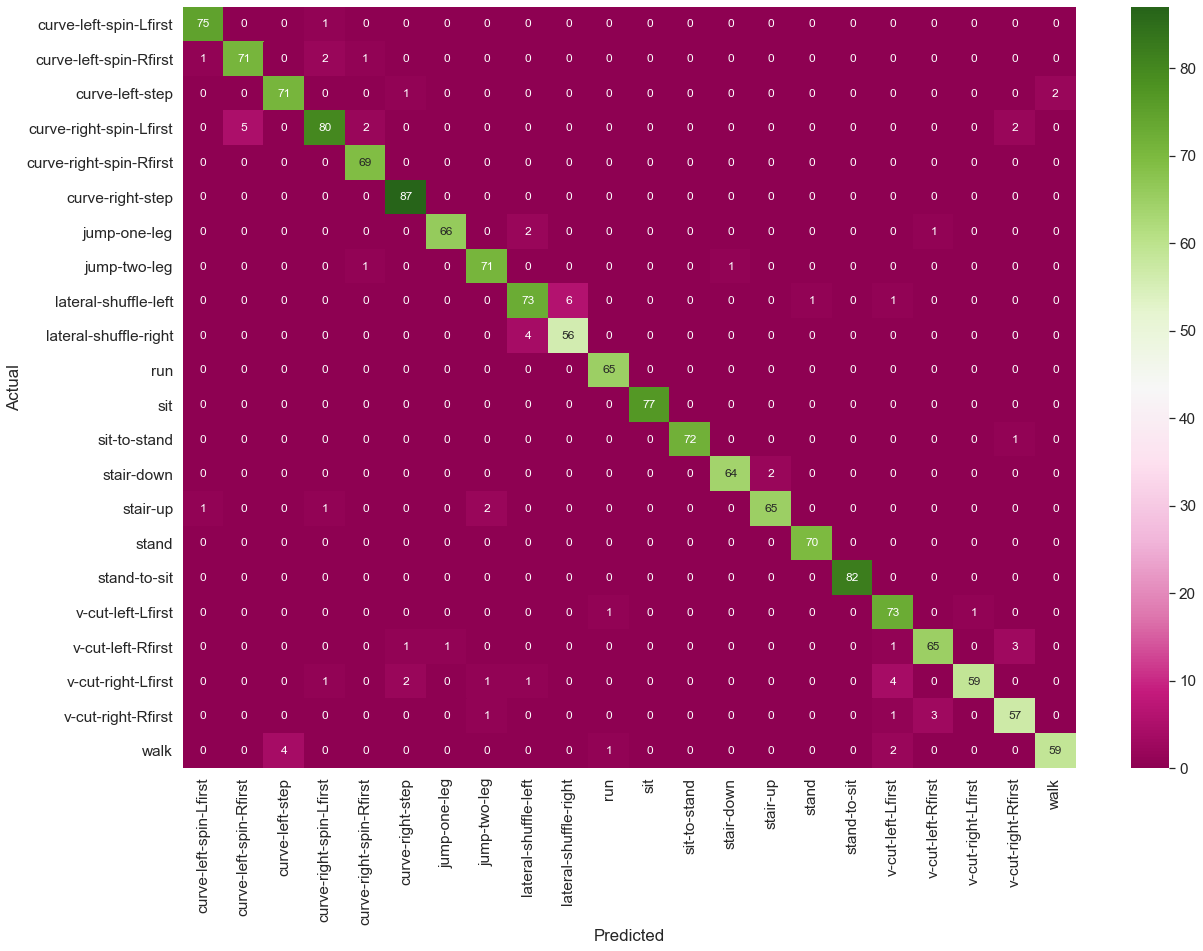

In [312]:
# Calculate confusion matrix
conf_mx = confusion_matrix(test_y, predictions)

# Plot confusion matrix
i = np.unique(labels)
conf_mx_df = pd.DataFrame(conf_mx, index=i, columns=i)
conf_mx_df.index.name = 'Actual'
conf_mx_df.columns.name = 'Predicted'

plt.figure(figsize = (20,14))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_mx_df, cmap="PiYG", annot=True,annot_kws={"size": 12})
plt.savefig('images/confusion_matrix.png', dpi=300, bbox_inches='tight')
